In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.constraints import maxnorm
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(42)

data=np.genfromtxt('pima-indians-diabetes.csv', delimiter=',')

X=data[:,0:8]
Y=data[:,8:9]
X_scaled=preprocessing.scale(X)

Using TensorFlow backend.


In [2]:
#Creates the model I want to run the data through with 10% dropout
voting_model=Sequential([Dense(4,kernel_initializer='normal',input_dim=8,activation='relu',kernel_constraint=maxnorm(3)),
    Dropout(.1),
    Dense(2, kernel_initializer='normal',activation='relu',kernel_constraint=maxnorm(3)),
    Dense(1,activation='sigmoid', kernel_initializer='normal'),
])

In [3]:
#compiles the model
voting_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=voting_model.fit(X,Y, epochs=100, verbose=0)

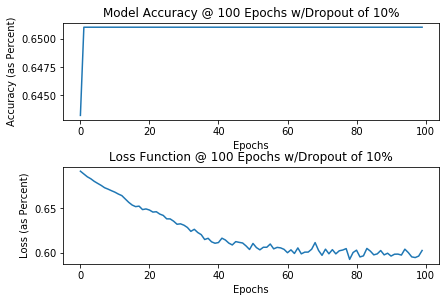

In [5]:
#Plots the accuracy and loss vs Epochs
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 100 Epochs w/Dropout of 10%')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 100 Epochs w/Dropout of 10%')
plt.tight_layout(pad=0.0001)
plt.show()

In [4]:
#Creates theh confusion matrix to veiw Accuracy
y_pred=voting_model.predict_classes(X)

CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

True negatives:  500
False negatives:  268
False positives:  0
True positives:  0


In [2]:
#Create the model with dropout of 20%
voting_model_2=Sequential([Dense(4,kernel_initializer='normal',input_dim=8,activation='relu',kernel_constraint=maxnorm(3)),
    Dropout(.2),
    Dense(2, kernel_initializer='normal',activation='relu',kernel_constraint=maxnorm(3)),
    Dense(1,activation='sigmoid', kernel_initializer='normal'),
])

In [3]:
#Compile the model
voting_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=voting_model_2.fit(X,Y, epochs=100, verbose=0)

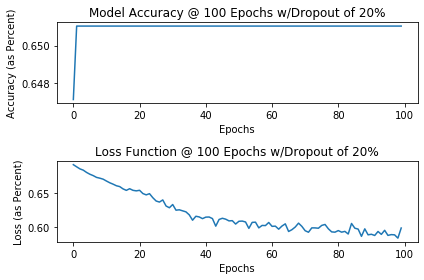

In [5]:
#Plots the Accuracy and Loss vs Epochs
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 100 Epochs w/Dropout of 20%')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 100 Epochs w/Dropout of 20%')
plt.tight_layout()
plt.show()

In [4]:
#plots the confusion
y_pred=voting_model_2.predict_classes(X)

CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

True negatives:  500
False negatives:  268
False positives:  0
True positives:  0


In [2]:
#Creates the model with 30% dropout
voting_model_3=Sequential([Dense(4,kernel_initializer='normal',input_dim=8,activation='relu',kernel_constraint=maxnorm(3)),
    Dropout(.3),
    Dense(2, kernel_initializer='normal',activation='relu',kernel_constraint=maxnorm(3)),
    Dense(1,activation='sigmoid', kernel_initializer='normal'),
])

In [3]:
#Compiles the model
voting_model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=voting_model_3.fit(X,Y, epochs=100, verbose=0)

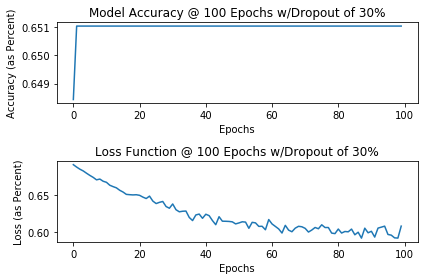

In [4]:
#Plots the model of accurarcy and loss vs Epochs
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 100 Epochs w/Dropout of 30%')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 100 Epochs w/Dropout of 30%')
plt.tight_layout()
plt.show()

In [9]:
#Creates the confusion matrix
y_pred=voting_model_3.predict_classes(X)

CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

True negatives:  500
False negatives:  268
False positives:  0
True positives:  0


Model Accuracy impoves a little bit, about .01 %,by increasing the Dropout rate 10 perecnt. However it appears that the Loss Rate goes up slightly by increasing the dropout rate. It also doesn't appear that the models do a good job of predicting true positives

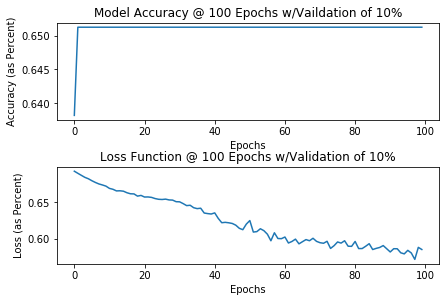

True negatives:  50
False negatives:  27
False positives:  0
True positives:  0


In [3]:
#Splits training and test data by 10%
x_train,X_test,y_train,Y_test=train_test_split(X,Y, test_size=.1,random_state=42)

#Compiles the model from 1st model
voting_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=voting_model.fit(x_train,y_train, epochs=100, verbose=0)

#Plots the accuracy and loss vs Epochs
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 100 Epochs w/Vaildation of 10%')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 100 Epochs w/Validation of 10%')
plt.tight_layout(pad=0.0001)
plt.show()

#Creates the confsuion matrix
y_pred=voting_model.predict_classes(X_test)

CM = confusion_matrix(Y_test, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])


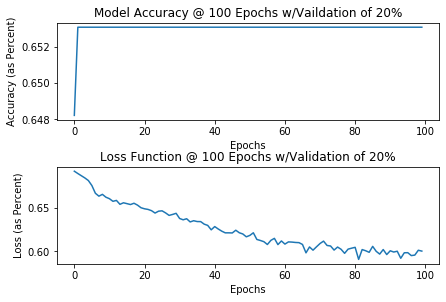

True negatives:  99
False negatives:  55
False positives:  0
True positives:  0


In [3]:
#Splits the data by 20% for validation
x_train,X_test,y_train,Y_test=train_test_split(X,Y, test_size=.2,random_state=42)

#Compiles model
voting_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=voting_model_2.fit(x_train,y_train, epochs=100, verbose=0)

#Plots the accuracy and loss vs Epochs
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 100 Epochs w/Vaildation of 20%')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 100 Epochs w/Validation of 20%')
plt.tight_layout(pad=0.0001)
plt.show()

#Prints the confusion martix
y_pred=voting_model_2.predict_classes(X_test)

CM = confusion_matrix(Y_test, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])


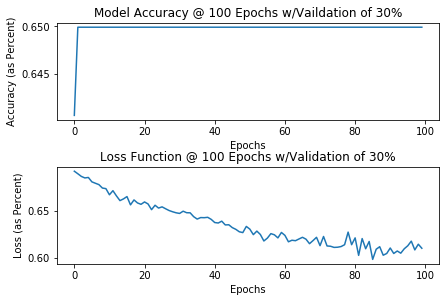

True negatives:  151
False negatives:  80
False positives:  0
True positives:  0


In [3]:
#Spilts the data 30% for validation
x_train,X_test,y_train,Y_test=train_test_split(X,Y, test_size=.3,random_state=42)
#Compiles the dat
voting_model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=voting_model_3.fit(x_train,y_train, epochs=100, verbose=0)
#Plots the accuracy and loss vs Epoch
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (as Percent)')
plt.title('Model Accuracy @ 100 Epochs w/Vaildation of 30%')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (as Percent)')
plt.title('Loss Function @ 100 Epochs w/Validation of 30%')
plt.tight_layout(pad=0.0001)
plt.show()

#Prints the confusion matrix
y_pred=voting_model_3.predict_classes(X_test)

CM = confusion_matrix(Y_test, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])


Even after splitting the data for validation, accuracy and loss appear to be the same as the dropout. The model still has trouble idenitfiying true positves. I suspect if I ran the model with more hidden layers and epochs the model accuracy would imporve.